# 3 ways to create a Machine Learning model with Keras and TensorFlow 2.0

This is a notebook for the medium article [3 ways to create a Machine Learning model with Keras and TensorFlow 2.0](https://medium.com/@bindiatwork/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)


In [104]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

## Exploring Data

In [29]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparing data for Keras and TensorFlow

In [31]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [35]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [37]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

In [40]:
# X_train

## 1. Sequential model

In [42]:
# Passing a list of layers to the constructor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(5, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Adding layer via add() method
model_seq = Sequential()
model_seq.add(Dense(5, activation='relu', input_shape=(4,)))
model_seq.add(Dense(10, activation='relu'))
model_seq.add(Dense(3, activation='softmax'))

model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 1.1 Training a Sequential model

In [45]:
model_seq.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [53]:
history = model_seq.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 0s 837us/sample - loss: 1.0693 - accuracy: 0.3258 - val_loss: 1.0267 - val_accuracy: 0.3478
Epoch 2/30
89/89 [==============================] - 0s 431us/sample - loss: 1.0653 - accuracy: 0.3258 - val_loss: 1.0272 - val_accuracy: 0.3478
Epoch 3/30
89/89 [==============================] - 0s 450us/sample - loss: 1.0603 - accuracy: 0.3258 - val_loss: 1.0265 - val_accuracy: 0.3478
Epoch 4/30
89/89 [==============================] - 0s 420us/sample - loss: 1.0562 - accuracy: 0.3483 - val_loss: 1.0242 - val_accuracy: 0.5217
Epoch 5/30
89/89 [==============================] - 0s 465us/sample - loss: 1.0525 - accuracy: 0.3820 - val_loss: 1.0252 - val_accuracy: 0.6522
Epoch 6/30
89/89 [==============================] - 0s 431us/sample - loss: 1.0485 - accuracy: 0.5393 - val_loss: 1.0258 - val_accuracy: 0.6957
Epoch 7/30
89/89 [==============================] - 0s 461us/sample - loss: 1.0447 - accurac

### 1.2 Model Evaluation

In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

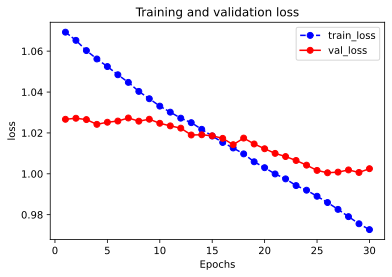

In [55]:
plot_metric(history, 'loss')

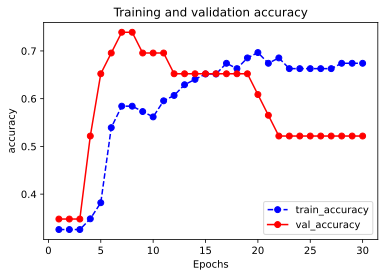

In [56]:
plot_metric(history, 'accuracy')

In [57]:
model_seq.evaluate(x = X_test,y = y_test)

38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9538187102267617, 0.7105263]

## 2. Functional API

In [68]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# This returns a tensor
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(5, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_18 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 2.1 Training a Function API model
Such model can be trained just like Keras Sequential model

In [61]:
# First configure model using model.compile()
model_fun_api.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Then, train the model with fit()
history = model_fun_api.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 1s 10ms/sample - loss: 1.5887 - accuracy: 0.3596 - val_loss: 2.0215 - val_accuracy: 0.1739
Epoch 2/30
89/89 [==============================] - 0s 475us/sample - loss: 1.4872 - accuracy: 0.3596 - val_loss: 1.9218 - val_accuracy: 0.1739
Epoch 3/30
89/89 [==============================] - 0s 470us/sample - loss: 1.4204 - accuracy: 0.3596 - val_loss: 1.8256 - val_accuracy: 0.1739
Epoch 4/30
89/89 [==============================] - 0s 486us/sample - loss: 1.3627 - accuracy: 0.3596 - val_loss: 1.7535 - val_accuracy: 0.1739
Epoch 5/30
89/89 [==============================] - 0s 463us/sample - loss: 1.3181 - accuracy: 0.3596 - val_loss: 1.6901 - val_accuracy: 0.1739
Epoch 6/30
89/89 [==============================] - 0s 461us/sample - loss: 1.2784 - accuracy: 0.3596 - val_loss: 1.6330 - val_accuracy: 0.1739
Epoch 7/30
89/89 [==============================] - 0s 486us/sample - loss: 1.2424 - accuracy

### 2.2 Model Evaludation

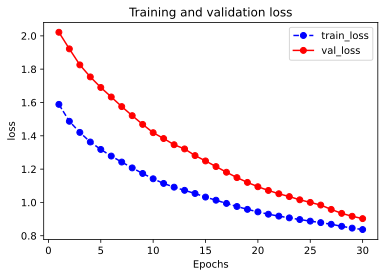

In [62]:
plot_metric(history, 'loss')

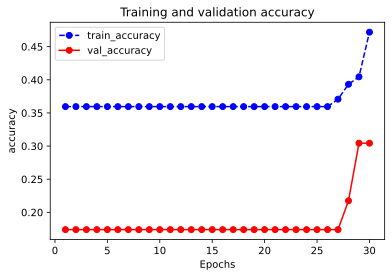

In [63]:
plot_metric(history, 'accuracy')

In [65]:
model_fun_api.evaluate(x = X_test,y = y_test)

38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8011450893000552, 0.6052632]

### 2.3 Multi-input and multi-output model

#### For the scenario with 2 inputs and 1 output

In [87]:
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structure = Input(shape=(4,), name='input_structure')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structure)
x_2 = Dense(100, activation='relu')(input_image)

c = concatenate([x_1, x_2])

outputs = Dense(3, activation='sigmoid', name='outputs')(c)

model = Model(inputs=[input_structure, input_image], outputs=outputs)

model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structure (InputLayer)    [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 10)           50          input_structure[0][0]            
__________________________________________________________________________________________________
dense_49 (Dense)                (None, 100)          25700       input_image[0][0]                
___________________________________________________________________________________________

#### For the scenario with 1 input and 2 outputs

In [89]:
## 1 inputs, 2 output

from tensorflow.keras.layers import concatenate

# only one input
input_image = Input(shape=(256,), name='input_image')

# middle layer
x = Dense(300, activation='relu')(input_image)

# output layer
output_1 = Dense(1, activation='sigmoid', name='output_1')(x)
output_2 = Dense(3, activation='softmax', name='output_2')(x)

model = Model(inputs=input_image, outputs=[output_1, output_2])

model.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_51 (Dense)                (None, 300)          77100       input_image[0][0]                
__________________________________________________________________________________________________
output_1 (Dense)                (None, 1)            301         dense_51[0][0]                   
__________________________________________________________________________________________________
output_2 (Dense)                (None, 3)            903         dense_51[0][0]                   
Total params: 78,304
Trainable params: 78,304
Non-trainable params: 0
_____________________

#### For the scenario with 2 inputs and 2 outputs

In [91]:
## 2 inputs, 2 outputs
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structured = Input(shape=(4,), name='input_structured')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structured)
x_2 = Dense(300, activation='relu')(input_image)

c = concatenate([x_1, x_2])

# output layser
output_1 = Dense(1, activation='sigmoid', name='output_1')(c)
output_2 = Dense(3, activation='softmax', name='output_2')(c)

model = Model(inputs=[input_structured, input_image], outputs=[output_1, output_2])

model.summary()

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structured (InputLayer)   [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_54 (Dense)                (None, 10)           50          input_structured[0][0]           
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 300)          77100       input_image[0][0]                
___________________________________________________________________________________________

### 2.4 Shared layer in Functional API

In [93]:
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
shared_layer = Dense(4, activation='relu')

# Now we apply the layer three times
x = shared_layer(inputs)
x = shared_layer(x)
x = shared_layer(x)
x = shared_layer(x)

predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_58 (Dense)                (None, 4)            20          input_14[0][0]                   
                                                                 dense_58[0][0]                   
                                                                 dense_58[1][0]                   
                                                                 dense_58[2][0]                   
__________________________________________________________________________________________________
dense_59 (Dense)                (None, 3)            15          dense_58[3][0]            

## 3. Model Subclassing

In [97]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class CustomModel(Model):
    
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1 = Dense(5, activation='relu', )
        self.dense2 = Dense(10, activation='relu')
        self.dense3 = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
        

my_custom_model = CustomModel(name='my_custom_model')

### 3.1 Training a Model Subclassing model

In [98]:
my_custom_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = my_custom_model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2)

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 1s 13ms/sample - loss: 1.5281 - accuracy: 0.3596 - val_loss: 1.6140 - val_accuracy: 0.1739
Epoch 2/30
89/89 [==============================] - 0s 571us/sample - loss: 1.3818 - accuracy: 0.3596 - val_loss: 1.4869 - val_accuracy: 0.1739
Epoch 3/30
89/89 [==============================] - 0s 711us/sample - loss: 1.3231 - accuracy: 0.3596 - val_loss: 1.4209 - val_accuracy: 0.1739
Epoch 4/30
89/89 [==============================] - 0s 598us/sample - loss: 1.2934 - accuracy: 0.3596 - val_loss: 1.3799 - val_accuracy: 0.1739
Epoch 5/30
89/89 [==============================] - 0s 575us/sample - loss: 1.2702 - accuracy: 0.3596 - val_loss: 1.3169 - val_accuracy: 0.3913
Epoch 6/30
89/89 [==============================] - 0s 597us/sample - loss: 1.2468 - accuracy: 0.5281 - val_loss: 1.2931 - val_accuracy: 0.4348
Epoch 7/30
89/89 [==============================] - 0s 603us/sample - loss: 1.2360 - accuracy

In [99]:
my_custom_model.summary()

Model: "my_custom_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             multiple                  25        
_________________________________________________________________
dense_67 (Dense)             multiple                  60        
_________________________________________________________________
dense_68 (Dense)             multiple                  33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 3.2 Model Evaluation

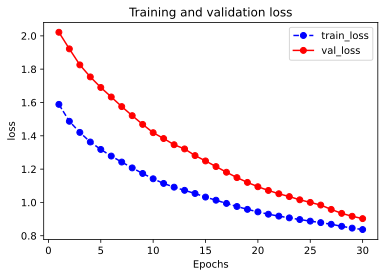

In [100]:
plot_metric(history, 'loss')

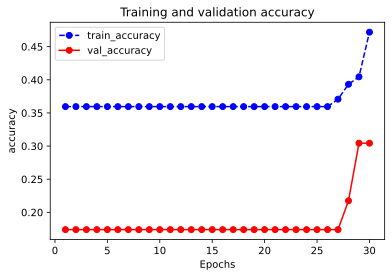

In [101]:
plot_metric(history, 'accuracy')

In [103]:
my_custom_model.evaluate(x = X_test,y = y_test)

38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.1410379598015232, 0.47368422]